<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/titinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("kaggle_titanic_train.csv")

In [ ]:
print(df.info()) #구조확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(df.shape)#모양 확인 (행렬) , 7개 컬럼으로 13개 데이터 가지고 있음

(891, 12)


In [ ]:
print(df.tail())

     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]


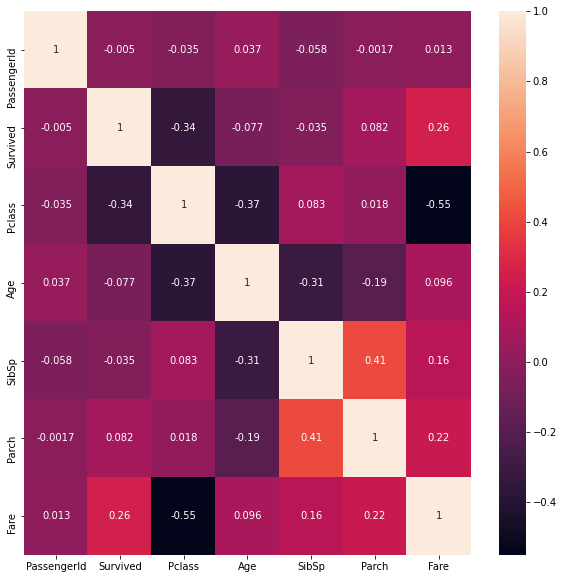

In [ ]:
#제대로 확인하려면 가공(전처리)한 후 다시 그려야 함, 전처리 후 아래 다시 확인
plt.figure(figsize=(10,10))#plot size 지정          #corr: 상관분석
sns.heatmap(data= df.corr(),annot=True, fmt=".2g") #데이터 프레임의 상관분석), annot=True : % 보여달라는 뜻,
# Y에 중요한 영향을 끼치는 것들 보고 싶기에 data= df.corr()에 X를 기입하지 않음
plt.show() #풀고 실행. 상관분석은 object를 제외하기에 수치형만 표시 됨
#대각은 본인이 본인이므로 1으로 표기되기에 관련이 있는것이 아님, 오른쪽 막대그래프를 확인
#음의 상관관계 : 범죄율이 올라갈수록 집값이 떨어짐, 양의 상관관계: 방의 크기가 올라갈 수록 집 값이 올라감
#survived는 가로로 보았을때 -0.34로 pclass와 관련이 높음(검은색), Fare와도 0.26으로 관련이 높음
#Fare와 pclass 도 검은색으로 (-0.55) 관련이 높음, 위와 아래중 하나만 확인(같음)
#위 기준으로 Survived-Pclass, Pclass-Age, Pclass-Fare은 관련성이 높음(검은색)

In [ ]:
#----------------------------------------
#Target 피쳐 선정
#1   Survived     891 non-null    int64
#-----------------------------------------

In [ ]:
X = df.drop("Survived", axis=1) #x : 입력값(데이터) , Survived를 뺴기에 (문제)
y = df["Survived"]              #y : 출력값(결과)                     (답안)
print(X[:2]) #X가 대문자인 이유는 머신러닝에서 matrix성의 데이터는 대문자로 필기하기 때문
print(y[:2])

   PassengerId  Pclass  ... Cabin Embarked
0            1       3  ...   NaN        S
1            2       1  ...   C85        C

[2 rows x 11 columns]
0    0
1    1
Name: Survived, dtype: int64


In [ ]:
#-------------------------------
# Object 처리(string을 인식하지 못함, 기계학습이 불가능)
#-------------------------------

In [ ]:
#  3   Name         891 non-null    object --> name은 필요없기에 성별로 대체
#  4   Sex          891 non-null    object --> lanbda식 이용해서 남성은 1, 여성은 0로 바꿈
#  8   Ticket       891 non-null    object --> 정규화되거나 의미있는 데이터로 보기가 어렵다고 판단
#  10  Cabin(선실)   204 non-null    object --> 전체데이터의 과반수 이상(687)건이 결측지(NaN)이므로 의미가 없다고 판단, 버림

In [ ]:
#df일괄로 수정 (성별)
X["Sex"] = X["Sex"].apply(lambda x : 0 if x == "female" else 1) #X 기준으로 감
print(X["Sex"].head()) #잘 바뀐것을 확인

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [ ]:
#문법공부, Cabin  C106 A51 , 이런식으로 되어있는 값에서 앞 글자 하나만 추출, Nan이 아닌 값만 뽑아오기, Cabin : 선실
cp = X[X["Cabin"].isnull() == False].copy() #X(원본)의 Cabin에서 null 이 아닌값만 뽑아오기, dd는 204건, .copy(): 필요한 부분만 따로 복사 해놓으라는 뜻
print(X.isnull().sum()) #Cabin에 null이 몇개 인지 확인하는 방법 (687개이므로 전체에서 절반이상이 결측이라 의미가 없음)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(cp.isnull().sum()) #Cabin데이터에 null 이 남아있는지 확인

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            19
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
dtype: int64


In [ ]:
X["Cabin2"] =  X["Cabin"].str[0:1] #cabin을 cabin2에 담음 , dd정보를 컬럼에 담아 신규칼럼을 만들어 str[0]번째 확인, 실제 적용값은 X에 담음
print(X["Cabin2"])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin2, Length: 891, dtype: object


In [ ]:
print(pd.crosstab(X["Cabin2"], y).T) #선실 칸에 따라 생존이 관련이 있나 확인,

Cabin2    A   B   C   D   E  F  G  T
Survived                            
0         8  12  24   8   8  5  2  1
1         7  35  35  25  24  8  2  0


In [ ]:
#Cabin이 등급칸과 관련이 있나 확인
print(pd.crosstab(X["Cabin2"], X["Pclass"]).T) #결과값은 1,2,3 등급의 A B C D E F G T 순서, A B C 룸 번호는 1등급 칸에만 있음(그러나 Cabin데이터의 양에 비해서 적음)

Cabin2   A   B   C   D   E  F  G  T
Pclass                             
1       15  47  59  29  25  0  0  1
2        0   0   0   4   4  8  0  0
3        0   0   0   0   3  5  4  0


In [ ]:
#Pclass 당 생존률을 확인
print(pd.crosstab(X["Pclass"], y).T) #1등급 칸이 생존률이 가장 높음(80명 사망이나 두배 가까이 생존), 2등급은 50:50 , 3등급 25%생존 75%사망

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [ ]:
#Pclass 당 성별을 확인
print(pd.crosstab([X["Pclass"],X["Sex"]], y).T) #0이 여성 1이 남성, 1등급 칸의 여성은 91명이 생존
#1등급 칸 91명, 2등급 칸 70명, 3등급칸 72명 생존(여성 기준), 1등급 220여 명에서 140여명 생존, 2등급 180여명에서 90여명 생존, 3등급 500여명에서 120여명 생존

Pclass     1       2       3     
Sex        0   1   0   1   0    1
Survived                         
0          3  77   6  91  72  300
1         91  45  70  17  72   47


In [ ]:
#나이를 예측하기 위해 이름의 호칭 추출 Sibsp Parch
X["Name2"] = X["Name"].str.extract("([A-Za-z]+)\.") #Name에서 끊어낸다(extract, 컴파일도 상관없음), [A-Za-z] : 대문자 A-Z나 소문자a-z로 시작함, \. : 특수기호의 점을 찾아와라
# fill_mean_func = lambda g: g["Age"].fillna(g.mean())
# X = X.groupby(by=["Name2"]).apply(fill_mean_func)
dict = X.groupby(by=["Name2"])[["Name2","Age"]].mean().astype(np.int32).to_dict() #딕셔너리화
print(dict['Age'])
fill_mean_func = lambda gname: gname.fillna(dict['Age'][gname.name]) #그룹의 이름이 내가 dic로 뽑아낸 값과 같으면 그 값으로 null값을 채워라
X = X.groupby('Name2').apply(fill_mean_func)
print(X[["Name2","Name","Age"]].head(10))
# X["Age"] = X["Age"].fillna(30)

{'Capt': 70, 'Col': 58, 'Countess': 33, 'Don': 40, 'Dr': 42, 'Jonkheer': 38, 'Lady': 48, 'Major': 48, 'Master': 4, 'Miss': 21, 'Mlle': 24, 'Mme': 24, 'Mr': 32, 'Mrs': 35, 'Ms': 28, 'Rev': 43, 'Sir': 49}
    Name2                                               Name   Age
0      Mr                            Braund, Mr. Owen Harris  22.0
1     Mrs  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2    Miss                             Heikkinen, Miss. Laina  26.0
3     Mrs       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4      Mr                           Allen, Mr. William Henry  35.0
5      Mr                                   Moran, Mr. James  32.0
6      Mr                            McCarthy, Mr. Timothy J  54.0
7  Master                     Palsson, Master. Gosta Leonard   2.0
8     Mrs  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0
9     Mrs                Nasser, Mrs. Nicholas (Adele Achem)  14.0


In [ ]:
#나이 구간화하기(나눈 몫으로 함)   11 12 13 --> 10 대 , 22 23 24 --> 20대, 80 --> 80대
# // : 몫 만 가져오기
#print(X["Age"].max())#최고령자 나이 확인, 실행안되면 x넣고 해보기, 실행 안될것
X["Age_cate"] = X["Age"].apply(lambda x : int(x//10))#해당하는 나이는 나이 구간으로 집어넣음, 몫으로 가지고 옴
print(X[["Age_cate", "Age"]]) #Age에 위 함수를 적용한 값을 Age_cate에 보여줌

     Age_cate   Age
0           2  22.0
1           3  38.0
2           2  26.0
3           3  35.0
4           3  35.0
..        ...   ...
886         2  27.0
887         1  19.0
888         2  21.0
889         2  26.0
890         3  32.0

[891 rows x 2 columns]


In [ ]:
print(pd.crosstab([X["Pclass"],X["Sex"], X["Age_cate"]], y).T) # Pclass에 Sex와 Age_cate당 생존률
#1등급 칸(0~6 은 나이를 의미) 여성은 3명 제외하고 전부 생존, 3등급칸은 뒤로 갈 수록 생존자가 줄어듬(1,8,4,16,17,2,0,0,0)
#잠재적 결론 1. 1등급 Pclass의 여성은 나이불문 대부분 생존, 남성은 1 > 2 > 3 등급순으로 생존

Pclass    1                                  ...  3                                 
Sex       0                         1        ...  0      1                          
Age_cate  0   1   2   3   4   5  6  0  1  2  ...  4  6   0   1   2    3   4  5  6  7
Survived                                     ...                                    
0         1   0   1   0   0   1  0  0  3  9  ...  9  0  15  38  86  128  23  6  2  2
1         0  13  16  35  13  11  3  2  2  9  ...  0  1  10   4  16   15   2  0  0  0

[2 rows x 44 columns]


In [ ]:
#  11  Embarked(배에 어느 부분에 탑승했는가(선착장). 누군가는 s, 누군가는 c , q에서 탑승)     889 non-null    object --> 생존과 무관해보임
print(pd.crosstab(X["Embarked"],y).T) #S에 탑승했으면 많이 죽었음(427, 217)
print(pd.crosstab([X["Embarked"],X["Pclass"]],y).T) # Embarked의 Pclass 확인, 
# c에 탑승시 사망 (26+8+41) 생존(59+9+25), S가 3등급 승객이 이용하는 게이트가 되었을 것이고 생존률은 비슷비슷 함(50:50)
#1등급은 C(26, 59), Q(1, 1), S(53, 74) 를 확인했을때 생존률이 높음, 3등급은 C(41, 25), Q(45, 27), S(286, 67) 을 확인했을때 많이 사망
#즉, C Q S 는 생존률과는 많은 상관이 없고 등급이 더 관련이 크므로, 생존을 확인할 때 Embarked는 빼도 됨

Embarked  21  35   C   Q    S
Survived                     
0          0   0  75  47  427
1          1   1  93  30  217
Embarked 21 35   C         Q          S         
Pclass    1  1   1  2   3  1  2   3   1   2    3
Survived                                        
0         0  0  26  8  41  1  1  45  53  88  286
1         1  1  59  9  25  1  2  27  74  76   67


In [ ]:
X["Embarked"] = X["Embarked"].apply(lambda x : 1 if x == "C" else (2 if x == "Q" else 3))
print(X["Embarked"])

0      3
1      1
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    1
890    2
Name: Embarked, Length: 891, dtype: int64


In [ ]:
# 병합 피쳐 : 중복된특징,
#  6   SibSp(형제나 자매)      891 non-null    int64
#  7   Parch(부모자식)        891 non-null    int64
X["SP"] = X["SibSp"] + X["Parch"] # Sibsp 와 Parch를 합산한 것을 SP로 칭함
print(X[["SP", "SibSp", "Parch"]]) # 2 와 1이 더해져서 3이 되는 등 잘 합쳐짐

     SP  SibSp  Parch
0     1      1      0
1     1      1      0
2     0      0      0
3     1      1      0
4     0      0      0
..   ..    ...    ...
886   0      0      0
887   0      0      0
888   3      1      2
889   0      0      0
890   0      0      0

[891 rows x 3 columns]


In [ ]:
# 삭제 피쳐 : 일련번호
#  0   PassengerId  891 non-null    int64
print(X.shape) #지우기전 shape 확인
X.drop("PassengerId", axis=1, inplace=True)#일련번호 삭제
print(X.shape) #지운 후 shape 확인 (891, 14)에서 (891, 13)으로 줄어듬

(891, 15)
(891, 14)


In [ ]:
#삭제 칼럼
print(X.shape)
print(X.info())

(891, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    int64  
 10  Cabin2    891 non-null    object 
 11  Name2     891 non-null    object 
 12  Age_cate  891 non-null    int64  
 13  SP        891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
None


In [ ]:
replace_col = ["SibSp", "Parch", "Name", "Name2", "Age"] #대체한 컬럼, SP = SibSp + Parch ,  Age_cate <-- Name, Name2, Age
del_col = ["Ticket", "Fare", "Cabin", "Embarked","Cabin2"] #필요 없는 컬럼, "Cabin2"는 object여서 삭제, name2로 나이평균을 구했다면 필요없음
#Ticket : 일련번호여서 삭제, Cabin : 방 번호 삭제(전체데이터의 75%가 결측치), / Fare : 요금, Embarked : 선착 구역 - 결측치나 일련번호 등은 아니라 살려놓아도 상괸없음
replace_col = replace_col + del_col
X.drop(replace_col, axis=1, inplace=True)
print(X.info()) #남아있는 컬럼, name2는 평균 나이를 채우기 위해 남겨둠, 나이가 채워지면 필요 없어짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age_cate  891 non-null    int64
 3   SP        891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB
None


In [ ]:
heat_df = X.copy()#heatmap 그릴 용도로 heat_df 사용

In [ ]:
heat_df["Servvvv"] = y #y데이터를 X에 넣은 후 X (가공 마친 데이터 상관분석)

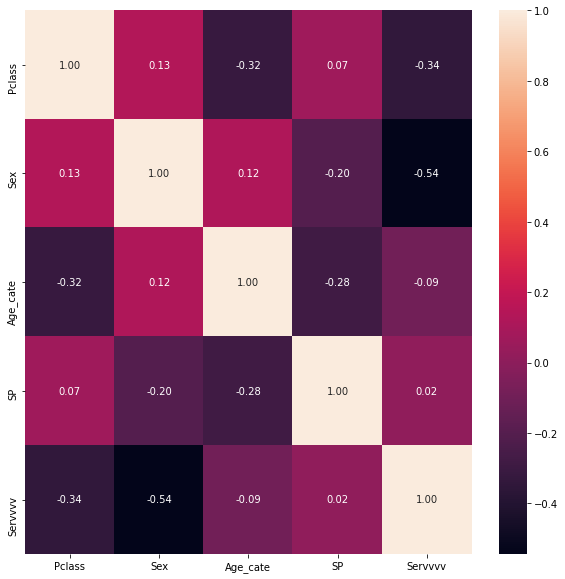

In [ ]:
plt.figure(figsize=(10,10))#plot size 지정  #fmt는 소숫점 이하 자릿수를 표시
sns.heatmap(data= heat_df.corr(),annot=True, fmt=".2f") #데이터 프레임의 상관분석), annot=True : % 보여달라는 뜻, Y에 중요한 영향을 끼치는 것들 보고 싶기에 data= df.corr()에 X를 기입하지 않음
#plt.show() #풀고 실행. 상관분석은 object를 제외하기에 수치형만 표시 됨
#Servvvv와 Sex가 관련성이 매우높음(검은색, -0.54), Servvv와 Age_cate의 관련성이 적은것(-0.078)으로 보아 항해의 법칙이 제대로 지켜지지 않음을 확인
#Pclass와 연관된것은 Afe_cate, Sex와 연관된것은 Servvvv와 관련됨

In [ ]:
#-----------------------------
#분석(모델선정/ 평가척도/ 검증)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121, shuffle=True) # 데이터 양이 작기에 test_size를 0.2로 잡음(20%) , return이 여러개일 수 있음
#문제와 답안 전체를 집어넣음


In [ ]:
#무슨 모델을(알고리즘) 사용할까
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score #평가
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier() #트리모델
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()#랜덤 포레스트

In [ ]:
models = [dt_model, knn_model, rf_model]  #루프돌며 각각의 점수를 확인
for model in models : ###############?????????????????????????????????????????r강사님 파일 확인
    # fit : 학습하다
    model.fit(X_train, y_train) #X_train(문제80)과 y_train(답안 80)을 fit(학습)
    # predict : 시험
    y_pred = model.predict(X_test) #predict(예측), 문제_테스트만 있고 답안을 뻄
    # score : 예측 정확도 확인
    score = accuracy_score(y_test, y_pred)
    #--f1, auc, accuracy, 교차검증
    #-- mse mae rmse
    #-- shiluet
    print(model.__class__)   
    print(model.__str__(), ":" , score) #0.9666666666666667

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.7932960893854749
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') : 0.7541899441340782
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
               

In [ ]:
##분석(예측)력을 저해하는 원인
#문제                         ->     해결법
# 1. 피쳐가 많은 경우        --> 모델의 복잡도가 증가하는 경우(오버피팅<-->언더피팅(현재 타이타닉 데이터)) print(X.head()) 으로 확인.
# 2. 수치가 큰 경우          --> log, scalling
# 3. 결측데이터(Null)       --> isnull(), fillna()
      #print(X.isnull().sum())로 결측데이터 없는 것 확인
# 4. 이상치(Outlier)       --> 협의 후 삭제/ 대체
      #데이터 이상치 유무를 boxplot으로 확인(사분위수, 박스플랏, 히스토, 산점도가 있음)
# 5. 데이터가 편중          --> 정규분포화 시키면 해결
# 6. 피쳐가공(Object --> 변환, 유니크한 일련번호(주민번호, 티켓번호)삭제, 구간화(범주화 시키기), 원핫(OH)인코딩)하게 되면 분석력을 높임
# 7. 데이터가 적은 경우      --> 데이터 증강시키면 해결
# 8. 모델이 적절하지 않는 경우--> 다른 모델 사용, 튜닝(Hyper Parameter)

In [ ]:
#---------------------------------------------------------------------
# 4. 이상치(Outlier) 확인, 문법만 숙지 데이터가 의미가 크게없고 실행이 오래걸림
# 4-1. boxplot, scatter plot 그리는 것, 문법만 숙지
#x=None, y=None, hue=None, data=None,
# fig, axes = plt.subplots(nrows=3, ncols=5)#차트 영역 만들기, 나눈것을 fig, axes로 가져감
# columns = df.columns
# for i, col in enumerate(columns) : # i : 루프돌며 컬럼이름과 번쨰를 꺼냄, columns 갯수만큼 i는 13번 회전, 열거형으로 바꾸려고 enumerate 사용
#     r = int(i / 5) # 13 / 5에 나머지가 있으므로 int로 캐스팅
#     c = i % 5
#     sns.boxplot(x=col, y='Survived', data=df, ax=axes[r][c]) #col 로 모든컬럼으로 루프를 돌려 Servived 확인
# plt.show()

In [ ]:
#----------------------------------------------------------------------
# 4-2. IQR : 25%~75% 범위 값 , 확인
def get_outlier(df=None, column=None):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    Q1 = np.percentile(df[column].values, 25)
    Q3 = np.percentile(df[column].values, 75)

    IQR = Q3 - Q1
    IQR_weight = IQR * 1.5 #이해할수 있는 마지노선 , 위에서 만든 값의 1.5배까지

    minimum = Q1 - IQR_weight
    maximum = Q3 + IQR_weight

    outlier_idx = df[column][(df[column] < minimum) | (df[column] > maximum)].index #해당하는 컬럼이 minimum보다 작습니까, 해당하는 컬럼이 maximum보다 큽니까? 조건을 만족하는 컬럼을 가지고 옴
    return outlier_idx

In [ ]:
# 함수 사용해서 이상치 값 삭제
numeric_columns = df.dtypes[df.dtypes != 'object'].index #수치형 feature만 따로 잡아감, ! = : !=
#print(numeric_columns) #Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
#columns = df.columns 실행안해도 될것 같음
for i, col in enumerate(numeric_columns) : #enumerate : i 와 columns 를 같이 회전시키기 위해
    oulier_idx = get_outlier(df=df, column=col)
    print(col , oulier_idx) #outlier 확인을 했을때, 총 900개 중에 200개를 버릴 수가 없어서 남겨둠(분석률이 더 떨어짐)
    ##df.drop(outlier_idx, axis=0, inplace=True) #drop은 하지 말기(데이터가 너무 적어서 안됨)


PassengerId Int64Index([], dtype='int64')
Survived Int64Index([], dtype='int64')
Pclass Int64Index([], dtype='int64')
Age Int64Index([], dtype='int64')
SibSp Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')
Parch Int64Index([  7,   8,  10,  13,  16,  24,  25,  27,  43,  50,
            ...
            855, 856, 858, 863, 869, 871, 879, 880, 885, 888],
           dtype='int64', length=213)
Fare Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)


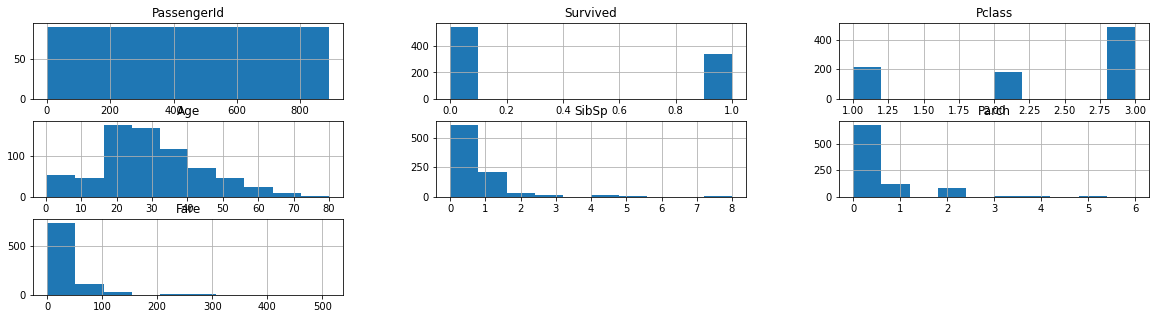

In [ ]:
# 5. 데이터가 편중          --> 정규분포화 시키면 해결
df.hist(figsize=(20,5)) #histogram 그리기 , 크게 봐야해서 (20,5)
##아래 꼭 주석 풀고 실행
plt.show()#fare은 요금, path(식구), sibsp는 바꿀 수 없음

In [ ]:
from sklearn.preprocessing import StandardScaler #평균 0 , 분산 1 로 데이터를 밀어넣음 , #m0 v1
#outlier 제거해야 minmaxscaler 잘 나옴
from sklearn.preprocessing import MinMaxScaler #최대 최소값을 0과 1 사이로 밀어넣음      # 0~1, 0~1 사이에 모든 데이터를 스케일링
from sklearn.preprocessing import RobustScaler # 중위수 기준으로 min max를 끌어넣음     #min~median~max , oullier의 영향을 가장 적게받음
#1,2,3,4,5,6,7,8,9 일떄 편차(중위값)은 5, 분산에서 루트 씌우면 편차
#scale은 수치가 달라지는 거지 분포도가 바뀌지 않음, 수치가 달라지므로(y값도 달라짐) 결과값은 달라짐

In [ ]:
scaler = StandardScaler()
# scaler.fit()
# scaler.transform() #scaler을 이용해서 transform
X_scaler = scaler.fit_transform(X) #위 두개를 한번에 하는 것, 스켈일링 된 데이터
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=121, shuffle=True)
models = [dt_model, knn_model, rf_model]  #루프돌며 각각의 점수를 확인
for model in models : ###############?????????????????????????????????????????r강사님 파일 확인
    # fit : 학습하다
    model.fit(X_train, y_train) #X_train(문제80)과 y_train(답안 80)을 fit(학습)
    # predict : 시험
    y_pred = model.predict(X_test) #predict(예측), 문제_테스트만 있고 답안을 뻄
    # score : 예측 정확도 확인
    score = accuracy_score(y_test, y_pred)
    #--f1, auc, accuracy, 교차검증
    #-- mse mae rmse
    #-- shiluet
    print(model.__class__)
    print(model.__str__(), ":" , score)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.7821229050279329
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') : 0.7653631284916201
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
               

In [ ]:
# 6. 피쳐가공(Object --> 변환, 유니크한 일련번호(주민번호, 티켓번호)삭제, 구간화(범주화 시키기), 원핫(OH)인코딩)하게 되면 분석력을 높임
#일련번호 삭제와 구간화(나이)는 실행함 , 원핫 인코딩만 하면 됨(object변환 후 수치형데이터로 바꾸고 원핫인코딩 실행)
#10대 -> 10 , 20대 -> 20, 80대--> 80 이 되는것이 큰 수는 더 좋다고 인식하므로 원핫 인코딩하기 좋음 , 희소데이터 : 0이 많은 데이터
#print(X.info()) #X 데이터 모양 확인
print(X["Age_cate"].head()) #원핫인코딩은 get범위를 이용

0    2
1    3
2    2
3    3
4    3
Name: Age_cate, dtype: int64


In [ ]:
print(X.info()) #먼저 지금의 모양 확인
##인코딩 , X에 있는 Age_cate 정리
#원핫인코딩
X_encoding = pd.get_dummies(data=X, columns=["Age_cate"], prefix = "OH_Age_cate") #prifix = " "의 이름을 설정해줌
print(X_encoding.info()) #OH_Age_cate_0 ~ 8 생긴것 확인
print(X_encoding.head().T) #짤리니까 T 시킴 , 본인것만 1 시키고 나머지는 0 시킴
#    Age_cate  OH_0  OH_1 원핫 인코딩시, (891, 12) + 9 개추가 --> (891, 21)
# 0  1         0     0
# 1  1         0     1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age_cate  891 non-null    int64
 3   SP        891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pclass         891 non-null    int64
 1   Sex            891 non-null    int64
 2   SP             891 non-null    int64
 3   OH_Age_cate_0  891 non-null    uint8
 4   OH_Age_cate_1  891 non-null    uint8
 5   OH_Age_cate_2  891 non-null    uint8
 6   OH_Age_cate_3  891 non-null    uint8
 7   OH_Age_cate_4  891 non-null    uint8
 8   OH_Age_cate_5  891 non-null    uint8
 9   OH_Age_cate_6  891 non-null    uint8
 10  OH_Age_cate_7  8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoding, y, test_size=0.2, random_state=121, shuffle=True)
models = [dt_model, knn_model, rf_model]  #루프돌며 각각의 점수를 확인
for model in models : ###############?????????????????????????????????????????r강사님 파일 확인
    # fit : 학습하다
    model.fit(X_train, y_train) #X_train(문제80)과 y_train(답안 80)을 fit(학습)
    # predict : 시험
    y_pred = model.predict(X_test) #predict(예측), 문제_테스트만 있고 답안을 뻄
    # score : 예측 정확도 확인
    score = accuracy_score(y_test, y_pred)
    #--f1, auc, accuracy, 교차검증
    #-- mse mae rmse
    #-- shiluet
    print(model.__class__)
    print(model.__str__(), ":" , score)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.7877094972067039
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') : 0.7597765363128491
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
               

In [ ]:
# ** 평가 메트릭스          --> conf._matrix, f1_score(), roc_auc(), accuracy_score()



# 7. 데이터가 적은 경우      --> 데이터 증강시키면 해결 ==> K-Fold, St.K-Fold, GridSearchCV(증강+튜닝)
# ==> 검증(신뢰), 대량의 학습으로 예측이 좋아진다

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
#값이 강사님과 다를 수 있음, 각각 생성되는 난수표가 다름

In [ ]:
#skf = KFold(n_splits=5,  shuffle=True, random_state=121) 수업떄 실행하지 않음
kf = KFold(n_splits=2,  shuffle=True, random_state=121)#n_splits : 문제 횟수(5~10회가 적절), Kford 객체 만들기, shuffle=True(붙으면서 값이 계속 달라짐) : 섞어라, random_state : 코드표
accuracy_score_list= []#점수 담을 리스트
f1_score_list= []
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age_cate  891 non-null    int64
 3   SP        891 non-null    int64
dtypes: int64(4)
memory usage: 28.0 KB
None


In [ ]:
#for (idx_train, idx_test) in kf.split(X): #kfold를 이용해서 X데이터를 5등분 하라는 뜻, split이 return해주는 건 X데이터에서 (0~24(시험용) 25~100(테스트), 0~24(테스트) 25~50(시험용) 51~100(테스트))
#i = 0
for i, (idx_train, idx_test) in enumerate(kf.split(X)): #enumerate : 코드 몇번 회전한것을 알려줌, #skf.split(X, y) : Skf 실행
    X_train, X_test = X.iloc[idx_train], X.iloc[idx_test] #train용 문제지, test용 문제지, df은 X와 y 다 가지고 있음
    y_train, y_test = y.iloc[idx_train], y.iloc[idx_test] #이제는 레이블이 찢을수 있기에 변경되어서 y 탑입
    #------------이하 학습 동일
        # fit : 학습하다
    rf_model.fit(X_train, y_train)
        # predict : 시험
    y_pred = rf_model.predict(X_test)  # predict(예측), 문제_테스트만 있고 답안을 뻄
        # score : 예측 정확도 확인
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_score_list.append(accuracy)
    f1 = f1_score(y_test, y_pred)
    f1_score_list.append(f1)
    print(i, ":", accuracy, f1)

    print("Kfold 평균 정확도:", np.mean(accuracy_score_list))
    print("Kfold 평균 F1:", np.mean(f1_score_list))
from sklearn.model_selection import cross_validate

0 : 0.8071748878923767 0.7345679012345678
Kfold 평균 정확도: 0.8071748878923767
Kfold 평균 F1: 0.7345679012345678
1 : 0.7865168539325843 0.6885245901639345
Kfold 평균 정확도: 0.7968458709124805
Kfold 평균 F1: 0.7115462456992512


In [ ]:
#cross_val_score 연습 (내부적으로 루프를 회전)
#estimator : 모델, cv : 스플릿, 몇개 증폭시킬지, n_jobs : 병렬처리, verbose : 로그 출력기능(종류)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
my_score={"acc":"accuracy", "f1":"f1"} #scoring 여러개 주는 방법
score_list = cross_validate(rf_model, X, y, scoring=my_score, cv=5, verbose=0) #랜덤포레스트 모델로 연습, verbose=0 : 로그 종류, 위 기능을 한 줄로 바꿀 수 있음
print("score_list----->", score_list)
score_df = pd.DataFrame(score_list)
print(score_df.head())
print("cross_validation 평균 정확도", score_df["test_acc"].mean())
print("cross_validation 평균 f1", score_df["test_f1"].mean())

#validation 을 줘서 멀티로 점수로 알 수 있음
# my_score={"acc":"accuracy", "f1":"f1"}
# score_list = cross_validation(rf_model, X, y, scoring="my_score", cv=5, verbose=0)

score_list-----> {'fit_time': array([0.15621877, 0.14904428, 0.15132785, 0.14945364, 0.14761281]), 'score_time': array([0.01161528, 0.01151395, 0.01258922, 0.01189017, 0.01154208]), 'test_acc': array([0.76536313, 0.82022472, 0.82022472, 0.79213483, 0.85393258]), 'test_f1': array([0.68181818, 0.75384615, 0.76811594, 0.68376068, 0.8030303 ])}
   fit_time  score_time  test_acc   test_f1
0  0.156219    0.011615  0.765363  0.681818
1  0.149044    0.011514  0.820225  0.753846
2  0.151328    0.012589  0.820225  0.768116
3  0.149454    0.011890  0.792135  0.683761
4  0.147613    0.011542  0.853933  0.803030
cross_validation 평균 정확도 0.8103759964848409
cross_validation 평균 f1 0.7381142528968616


In [ ]:
#GridSearchCV(param) --> 튜닝전용
#랜덤포레스트 튜닝
#총 loop 횟수 : 1[100] * 4[3,5,7,9] * 3[1,3,5] = 12번
my_hyper_param = { "n_estimators"    :[100],#,300],
                   "max_depth"       :[3,5,7,9],
                   "min_samples_leaf":[1,3,5],
                   "random_state" : [121,]}

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring="accuracy", refit=True, cv=5, verbose=0) #cv: 코드회전 횟수, rf_model:랜덤포레스트 모델
# ------------이하 학습 동일
# fit : 학습하다
gcv_model.fit(X_train, y_train)
# predict : 시험

print("best_estimator_", gcv_model.best_estimator_)#제일 좋은 모델
print("best_params_",    gcv_model.best_params_) #제일 좋은 파라미터
print("best_score_" ,    gcv_model.best_score_) #제일잘나온 점수, Kfold 평균 F1: 0.7121520159423498 이 부분보다 점수가 높아야 함

my_score={"acc":"accuracy", "f1":"f1"}
gcv_model = GridSearchCV(rf_model, param_grid=my_hyper_param, scoring=my_score, refit="f1", cv=5, verbose=0)

best_estimator_ RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=121,
                       verbose=0, warm_start=False)
best_params_ {'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 121}
best_score_ 0.80729088639201


In [ ]:
#이하가 꺼내는 방법 차이
print("GridSearchCV 평균 정확도 : " , gcv_model.cv_results_["mean_test_acc"].mean())  #mean_test_(본인의score키값), print(gcv_df.info())확인
print("GridSearchCV 평균 F1 : "    , gcv_model.cv_results_["mean_test_f1"].mean())  #.cv_results_ :그리드 서치의 결과, 내장함수

gcv_df = pd.DataFrame(gcv_model.cv_results_)
print(gcv_df.info())
print("GridSearchCV 평균 정확도 : " , gcv_df["mean_test_acc"].mean())
print("GridSearchCV 평균 F1 : "    , gcv_df["mean_test_f1"].mean())


#confusion-matrix(오차행렬), auc-roc
from sklearn.metrics import confusion_matrix


AttributeError: ignored